In [1]:
# -*- coding: utf-8 -*-
import os
import makeDataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import cv2
from IPython import display
import random


#from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

files = makeDataset.loadData()
print(files)
emptyMnist = makeDataset.dataSet(files)


with open("./testImage.data" , 'rb') as f:
    testImage = pickle.load(f)
with open("./testLabel.data" , 'rb') as f:
    testLabel = pickle.load(f)
with open("./trainImage.data" , 'rb') as f:
    trainImage = pickle.load(f)
with open("./trainLabel.data" , 'rb') as f:
    trainLabel = pickle.load(f)    

with open("./testAnswer.data" , 'rb') as f:
    testAnswer = pickle.load(f)
    
    
emptyMnist.train.images = trainImage
emptyMnist.train.labels = trainLabel
emptyMnist.test.images = testImage
emptyMnist.test.labels = testLabel
mnist = emptyMnist
mnist.train.num_examples = len(mnist.train.labels)
mnist.test.num_examples = len(mnist.test.labels)
numOfTests = len(mnist.test.labels)

print("원본 이미지 사이즈는 682 X 700 입니다.")
print("64 X 64 로 리사이즈 되었습니다.")
print("각각의 좌표는 0.00 ~ 1.0 로 스케일 하였습니다.")
print("실제 좌표와 추정 좌표가 잘 맞는지 확인 하기 위해서 testAnswer를 사용 합니다")
print("다시 좌표를 복원 할때는 175X170 사이즈를 고려 하여 스케일 해 주어야 합니다")



[]
1/2 : make Train Dataset
***************
2/2 : make Train Dataset
***************
원본 이미지 사이즈는 682 X 700 입니다.
64 X 64 로 리사이즈 되었습니다.
각각의 좌표는 0.00 ~ 1.0 로 스케일 하였습니다.
실제 좌표와 추정 좌표가 잘 맞는지 확인 하기 위해서 testAnswer를 사용 합니다
다시 좌표를 복원 할때는 175X170 사이즈를 고려 하여 스케일 해 주어야 합니다


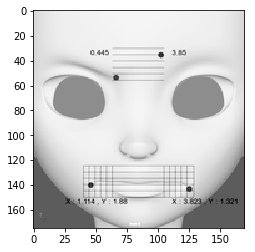

In [2]:
plt.imshow(testAnswer[0].reshape((175,170))*-1, cmap='Greys')

In [3]:
# 변수들을 설정한다.
x = tf.placeholder(tf.float32, [None, 4096])
W1 = tf.Variable(tf.random_normal([4096, 4096] , stddev=0.001))
b1 = tf.Variable(tf.zeros([4096]))
y1 = tf.matmul(x, W1) + b1
y1 = tf.nn.sigmoid(y1+0.000001)

W2 = tf.Variable(tf.random_normal([4096, 8] , stddev=0.001))
b2 = tf.Variable(tf.zeros([8])) 
y2 = tf.matmul(y1, W2) + b2 
y5 = y2



In [4]:
# cross-entropy 모델을 설정한다.
y_ = tf.placeholder(tf.float32, [None, 8])
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y5), reduction_indices=[1]))
cost = tf.reduce_mean(tf.square( y_ - y5))
#train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)#
train_step = tf.train.AdamOptimizer(0.000001).minimize(cost)

In [5]:
# 경사하강법으로 모델을 학습한다.
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [6]:
def testMnist(cost , y , images ,labels ,indexes , NumOfShow ):
    # 학습된 모델이 얼마나 정확한지를 출력한다.
    result = sess.run([cost , y] , feed_dict={x: images, y_: labels})
    print("Cost : " , result[0])
    for i in range(NumOfShow):
        lb = result[1][i]
        image = testAnswer[indexes[i]].reshape((175,170))*-1
        for ii , l in enumerate(lb):
            if ii%2 == 0:
                yy = int(l*175.0) # Y 리스케일링
            else:
                xx = int(l*170.0) # X 리스케일링
                cv2.circle(image,(yy , xx), 5, (0,255,0), -1)#테스트 이미지에 좌표를 그려준다
        plt.imshow(image, cmap='Greys')#테스트 이미지 출력
        display.display(plt.gcf())#이미지를 실시간으로 표현한다


In [ ]:
for i in range(1000000000000):
    if i%50 == 0 :
        print("train epoch is " , i)
        test_images = []
        test_labels = []
        indexes = []
        for _ in range(50):
            index = random.randrange(0,numOfTests)
            indexes.append(index)
            test_images.append(mnist.test.images[index])
            test_labels.append(mnist.test.labels[index])
        
        testMnist(cost , y5 , test_images , test_labels  , indexes , 3 )
    #batch_xs, batch_ys = mnist.next_batch(100)
    sess.run(train_step, feed_dict={x: mnist.train.images , y_: mnist.train.labels})

